# `Thera Bank Personal Loan Campaign`


## `Data Description:`
The dataset contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer's relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to
them in the earlier campaign.

## `Domain:`
Banking

## `Context:`
This case is about a bank (Thera Bank) whose management wants to explore ways of converting
its liability customers to personal loan customers (while retaining them as depositors). A
campaign that the bank ran last year for liability customers showed a healthy conversion rate of
over 9% success. This has encouraged the retail marketing department to devise campaigns
with better target marketing to increase the success ratio with a minimal budget.

## `Attribute Information:`
 ID: Customer ID

 Age: Customer's age in completed years

 Experience: #years of professional experience

 Income: Annual income of the customer ($000)

 ZIP Code: Home Address ZIP code.

 Family: Family size of the customer

 CCAvg: Avg. spending on credit cards per month ($000)

 Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

 Mortgage: Value of house mortgage if any. ($000)

 Personal Loan: Did this customer accept the personal loan offered in the last campaign?

 Securities Account: Does the customer have a securities account with the bank?

 CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

 Online: Does the customer use internet banking facilities?

 Credit card: Does the customer use a credit card issued by the bank?

## `Objective:`
The classification goal is to predict the likelihood of a liability customer buying personal loans.

----------------------

## `Index`

----------------------
- <a href = #link1>Import Libraries and Load Dataset </a>


- <a href = #link2>EDA Analysis</a> 


- <a href = #link3>Split Data into Train & Test</a>


- <a href = #link4>Logistic Regression Model</a> 


- <a href = #link5>Parameter & Metrics Analysis</a>


- <a href = #link6>Business Insights</a>

## Steps & Tasks

## <a id = "link1"></a> 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [128]:
#####################################################
### Import all the necessary libraries and methods
#####################################################
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score,roc_auc_score,accuracy_score

import math


In [129]:
#####################################################
### Import Dataset & Analyze the Data
#####################################################
loanData = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
print("CHECK# 1.1:\tHead of Loaded Loan Data : \n\n",loanData.head())
print("\n\nCHECK# 1.2:\tloadData Dimensions (rows,cols) : ",loanData.shape)
print("\n\nCHECK# 1.3:\tDataTypes used in loanData: \n\n",loanData.dtypes)
print("\n\nCHECK# 1.4:\tStatistical Summary of loanData:\n\n",loanData.describe().T)
print("\n\nCHECK# 1.5:\n\tTotal Null Values in loanData:\n\n",loanData.isnull().sum())
print("\n\n\tTotal 'na' Values in loanData:\n\n",loanData.isna().sum())


CHECK# 1.1:	Head of Loaded Loan Data : 

    ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


CHECK# 1.2:	loadData Dimensions (rows,cols) :  (5

**Insights:**

- There are 5000 entries in the dataset with 14 columns
- All the columns are numerical data types
- Categorical Columns - Education, Securities Account, Personal Loan, CD Account, Online, CreditCard
- Average age of the loan applications is 45yrs
- Average Work-Experience of loan applications is 20yrs
- Around 29% of the customers use Credit Card issued by Thera Bank
- Only around 6% of the customers have CD Account and 10% have Securities Account
- There seems to be outliers in Experience column as it contains Negative values
- Around 60% of the customers use Online-Banking


## <a id = "link2"></a> 2. EDA: Study the data distribution in each attribute and target variable, share your findings.

**2.1 Number of unique in each column?**

**2.2 Number of people with zero mortgage?**

**2.3 Number of people with zero credit card spending per month?**

**2.4 Value counts of all categorical columns.**

**2.5 Univariate and Bivariate**

**2.6 Get data model ready**


CHECK# 2.1:	Unique Values in loanData:

 ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


CHECK# 2.2:	People with Zero Mortgage:  3462


CHECK# 2.3:	Peope with Zero Credit Card Spending per Month:  106


CHECK# 2.4:	Value Count of all Categorical Columns: 


Column Name:  Education

 1    2096
3    1501
2    1403
Name: Education, dtype: int64

Column Name:  Securities Account

 0    4478
1     522
Name: Securities Account, dtype: int64

Column Name:  Personal Loan

 0    4520
1     480
Name: Personal Loan, dtype: int64

Column Name:  CD Account

 0    4698
1     302
Name: CD Account, dtype: int64

Column Name:  Online

 1    2984
0    2016
Name: O

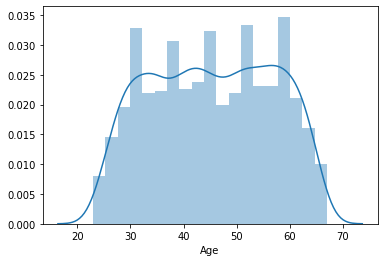

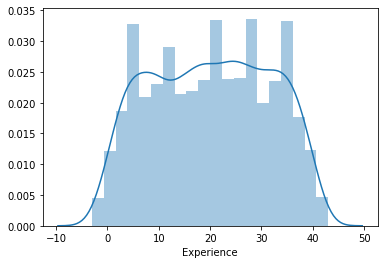

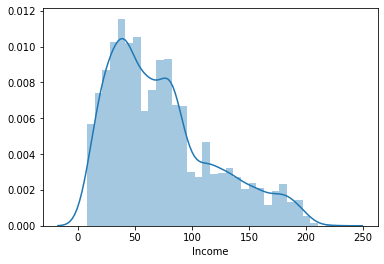

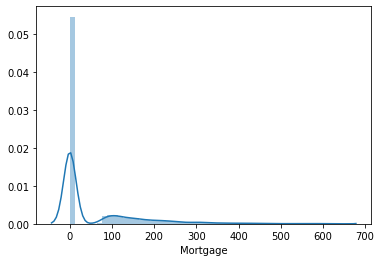

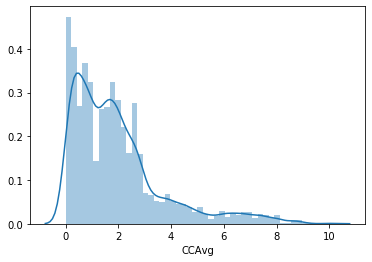

In [130]:
print("\nCHECK# 2.1:\tUnique Values in loanData:\n\n",loanData.nunique())
print("\n\nCHECK# 2.2:\tPeople with Zero Mortgage: ",(loanData["Mortgage"]==0).sum())
print("\n\nCHECK# 2.3:\tPeope with Zero Credit Card Spending per Month: ",(loanData["CCAvg"]==0).sum())
print("\n\nCHECK# 2.4:\tValue Count of all Categorical Columns: \n")
for colm in ['Education', 'Securities Account', 'Personal Loan', 'CD Account', 'Online', 'CreditCard']:
    print("\nColumn Name: ",colm)
    print("\n",loanData[colm].value_counts())
    
print("\n\nCHECK# 2.5: Univariate Analysis Using Distribution Plot on Continous Variables\n")
for colm in ['Age','Experience','Income','Mortgage','CCAvg']:
    sns.distplot(loanData[colm])
    plt.show()


**Insights:**

- Both Work_Experience and Age are quite evenly distributed across all the values
- Most of the customers have income between 50k-100k USD
- Maximum number of customers dont have a mortgage 
- Maximum number of customers have their Credit-card usage between 0-2k USD/month



CHECK# 2.5: Bivariate Analysis Using Distribution Plot on Continous Variables


	 PAIR-PLOT TO UNDERSTAND CORRELATION w.r.t Personal Loan



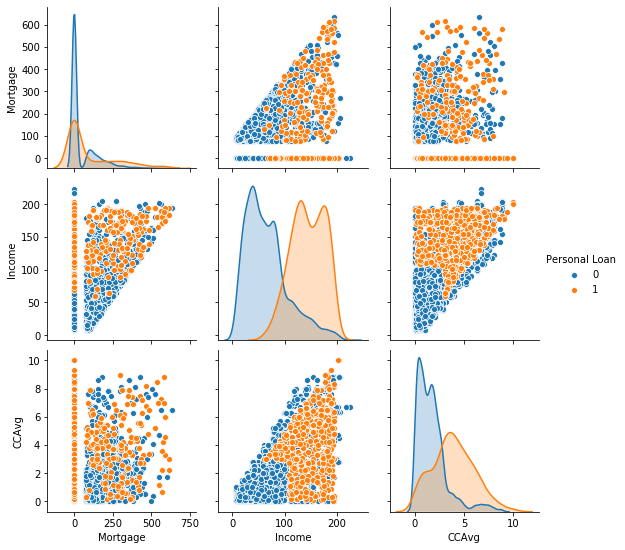

In [131]:
print("\n\nCHECK# 2.5: Bivariate Analysis Using Distribution Plot on Continous Variables\n")
print("\n\t PAIR-PLOT TO UNDERSTAND CORRELATION w.r.t Personal Loan\n")
sns.pairplot(loanData[['Mortgage', 'Income', 'CCAvg', 'Personal Loan']], hue = 'Personal Loan', diag_kind = 'kde');


	 HEATMAP TO UNDERSTAND CORRELATION



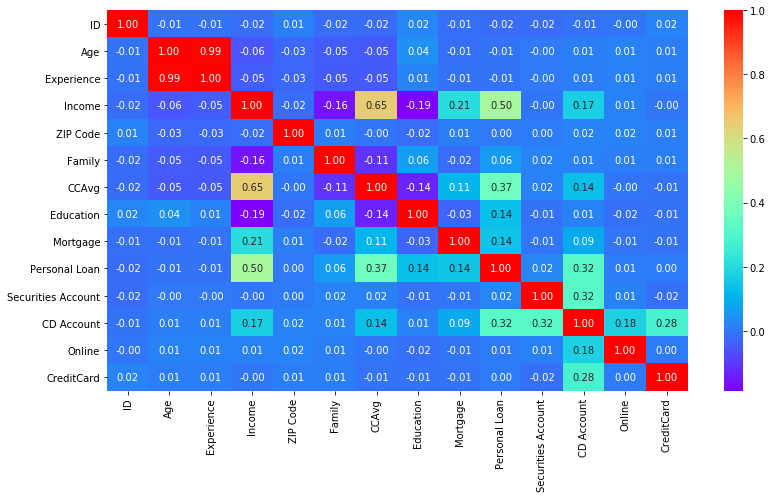

In [132]:
print("\n\t HEATMAP TO UNDERSTAND CORRELATION\n")
corr = loanData.corr()
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f', cmap='rainbow')

**Insights From Bi-Variate Analysis:**

- Personal Loan has high correlation to Income, CCAvg(Credit Card Usage) and CD Account 
- Columns - LoanID, Education, Family, Zip Code, Experience , are safe to drop because they are barely contibute to the chance of customer accepting Personal Loan 

In [133]:
# Dropping all the unnecessary columns based on Heatmap Insight
modLoanData = loanData.copy()
modLoanData.drop(columns ='ID',inplace=True)
modLoanData.drop(columns='Education', inplace=True)
modLoanData.drop(columns='Family', inplace=True)
modLoanData.drop(columns ='Experience',inplace= True)
modLoanData.drop(columns ='ZIP Code',inplace= True)

In [138]:
print("\n\nCHECK #2.6:\t Modified DataSet For Preparing Data Model & Applying Regression:\n\n",modLoanData.head())



CHECK #2.6:	 Modified DataSet For Preparing Data Model & Applying Regression:

    Age  Income  CCAvg  Mortgage  Personal Loan  Securities Account  \
0   25      49    1.6         0              0                   1   
1   45      34    1.5         0              0                   1   
2   39      11    1.0         0              0                   0   
3   35     100    2.7         0              0                   0   
4   35      45    1.0         0              0                   0   

   CD Account  Online  CreditCard  
0           0       0           0  
1           0       0           0  
2           0       0           0  
3           0       0           0  
4           0       0           1  


## <a id = "link3"></a>3. Split the data into training and test set in the ratio of 70:30 respectively

In [154]:
# Storing predictors (Independent Variables) in X and target(Dependent Variable) y
X = modLoanData.drop('Personal Loan', axis=1)
y = modLoanData['Personal Loan'] 

# Splitting the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=57)

print("\n\n CHECK# 3.1:\t Training Data Set\n")
Xtrain.info()
print("\n\n Statistical Description of Training Data Set\n",Xtrain.describe().T)
print("\n\n CHECK# 3.2:\t Testing Data Set\n")
Xtest.info()
print("\n\n Statistical Description of Training Data Set\n",Xtest.describe().T)




 CHECK# 3.1:	 Training Data Set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 79 to 3023
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 3500 non-null   int64  
 1   Income              3500 non-null   int64  
 2   CCAvg               3500 non-null   float64
 3   Mortgage            3500 non-null   int64  
 4   Securities Account  3500 non-null   int64  
 5   CD Account          3500 non-null   int64  
 6   Online              3500 non-null   int64  
 7   CreditCard          3500 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 246.1 KB


 Statistical Description of Training Data Set
                      count       mean         std   min   25%   50%    75%  \
Age                 3500.0  45.461143   11.476553  23.0  35.0  45.0   55.0   
Income              3500.0  74.188286   46.111161   8.0  39.0  64.0  100.0   
CCAvg               3500.0   1.95

## <a id = "link4"></a>4. Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance 

In [155]:
# Building logistic Regression Model
logitModel = LogisticRegression(solver = 'liblinear')
logitModel.fit(Xtrain, ytrain)
y_predicted = logitModel.predict(Xtest)

# Model Performance Evaluation
print(classification_report(ytest, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1360
           1       0.64      0.44      0.52       140

    accuracy                           0.92      1500
   macro avg       0.79      0.70      0.74      1500
weighted avg       0.91      0.92      0.92      1500



**Insights from Classification Report:**

- support: Total number of occurences of each class of dependent variable in Test Dataset
- Precision: Fraction of True Positives v/s All Positives predicted by the Logit Model
- recall: Fraction of True Positive v/s  All Actual Postives.
- f1-score: Weighted Harmonic Mean of Precision & recall 
- Accuracy: Fraction of all observations that are correctly predicted by the Logit Model

**SUMMARY: Overall the Model seems to have accurately predicted cases where Loan Status is 0, meaning customers who rejected Loans, than the one who accepted the Loan offers. This can be attributed to the sample-size that accepted the Loan offer is very less compared to the one who rejected the loans** 


## <a id = "link5"></a>5. Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not? 

In [171]:
# Sub-routine For Confusion Matrix
def build_cfmx(actual,predicted):
    cfmx = confusion_matrix(actual,predicted)
    sns.heatmap(cfmx,annot=True, fmt='.2f',xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

		Confusion Matrix


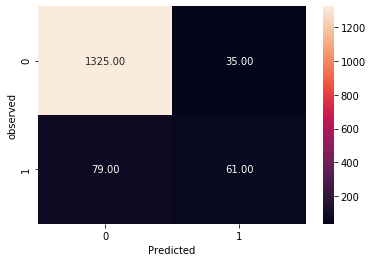

In [175]:
# Analyzing using Confusion Matrix
print('\t\tConfusion Matrix')
build_cfmx(ytest, y_predicted)

In [182]:
print("\nTraining accuracy:\t ",logitModel.score(Xtrain,ytrain))  
print("Testing accuracy:\t",logitModel.score(Xtest, ytest))
print("Recall:\t",recall_score(ytest,y_predicted))
print("Precision:\t",precision_score(ytest,y_predicted))
print("F1 Score:\t",f1_score(ytest,y_predicted))
print("Roc Auc Score:\t",roc_auc_score(ytest,y_predicted))


Training accuracy:	  0.9211428571428572
Testing accuracy:	 0.924
Recall:	 0.4357142857142857
Precision:	 0.6354166666666666
F1 Score:	 0.5169491525423728
Roc Auc Score:	 0.7049894957983194


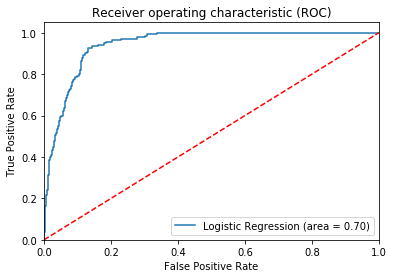

In [183]:
# !pip install yellowbrick
# Area Under Curve (AUC) ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(ytest, logitModel.predict(Xtest))
fpr, tpr, thresholds = roc_curve(ytest, logitModel.predict_proba(Xtest)[:,1])
plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Insights:**
- Area Under the Curve depicts the rate of successful prediction by the Logistic Model
- The goal is to minimize the False Positive Rate and Maximize the True Positive Rate
- Therefore, the best Threshold to choose on deciding whether a customer accepts a loan offer or not is at the shoulder of the ROC curve. Hence, in this case, Best Threshold is approximately gives FPR=0.1 & TPR=0.8

In [194]:
## Coefficient Importance/Weights  
coeffW = pd.DataFrame()
coeffW['Col'] = Xtrain.columns
coeffW['Coeff'] = np.round(abs(logitModel.coef_[0]),2)
coeffW.sort_values(by='Coeff',ascending=False)

,Col,Coeff
5,CD Account,3.18
7,CreditCard,0.90
4,Securities Account,0.86
6,Online,0.56
2,CCAvg,0.07
1,Income,0.03
0,Age,0.01
3,Mortgage,0.00


## 6. <a id = "link6"></a>Give Business understanding of your model?

##### `Confusion matrix :`
*True Positive (observed=1,predicted=1):* Predicted that customer accepts loan offer and the customer did accept the loan offer

*False Positive (observed=0,predicted=1):* Predicted that customer accepts loan offer and the customer did not accept the loan offer

*True Negative (observed=0,predicted=0):* Predicted that customer rejects the loan offer and the customer did reject the loan offer

*False Negative (observed=1,predicted=0):* Predicted that customer rejects the loan offer and the customer accepted the loan offer

##### `Important Features Based on the coefficients value:`

*Best Influencers of the Model:* "CD_Account", "CrediCard", "Securities Account", "Online"

*Least Influencers of the Model:* "CCAvg", "Income", "Age", and "Mortgage"

##### `Important Metrics For the Business`

In this case study, the Bank wants to convert their liability customers into personal loan customers, which means they want as many customers to accept their loan offer as possible. This translates to Bank wanting to have **LESS FALSE NEGATIVES**. If FN is high then bank would lose an opportunity to earn interest based on the personal loans accepted by the customers. Hence, **RECALL becomes an important metric which needs to be Maximized**, which is comparison of TP to (TP+FN) 


## Appendix:

- **warnings.filterwarnings("ignore")** : Never print matching warnings.

- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **Numpy** : The fundamental package for scientific computing with Python.

- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **pairplot** : Plot pairwise relationships in a dataset.

- **boxplot** : Draw a box plot to show distributions with respect to categories.

- **distplot** : Flexibly plot a univariate distribution of observations.

- **pandas.DataFrame.corr** : Compute pairwise correlation of columns, excluding NA/null values.

- **sklearn.linear_model.LogisticRegression** : Logistic Regression (aka logit, MaxEnt) classifier.

- **yellowbrick** : Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier. Under the hood, it  uses Matplotlib